In [2]:
import pandas as pd
from datetime import datetime

In [239]:
df = pd.read_csv('../../tennis-prediction/single_glicko_2000_start_7d_2018.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] < datetime(2018, 12, 31)]

df.shape

(2593, 17)

In [240]:
import numpy as np

np.mean(df['winner_prob'] > 0.5)

0.6413420748168145

In [241]:
from tpr.evaluation.evaluator import Evaluator

In [242]:
Evaluator.logloss(np.ones(df.shape[0]), df['winner_prob'].values)

0.6331258913517949

In [243]:
by_tournament = df.groupby('tournament_name').apply(lambda x: Evaluator.logloss(np.ones(x.shape[0]), x['winner_prob'])).sort_values()

In [244]:
df_2 = pd.read_csv('../../tennis-prediction/gp_laplace_2016_start_matern12_32_2019_logit.csv')
df_2['date'] = pd.to_datetime(df_2['date'])
df_2 = df_2[df_2['date'].dt.year == 2018]

In [245]:
by_tournament_2 = df_2.groupby('tournament_name').apply(lambda x: Evaluator.logloss(np.ones(x.shape[0]), x['winner_prob'])).sort_values()



In [246]:
merged = df.merge(df_2, on=['winner', 'loser', 'date'], suffixes=['_elo', '_gp'])

(Evaluator.logloss(np.ones(merged.shape[0]), merged['winner_prob_elo']), 
 Evaluator.logloss(np.ones(merged.shape[0]), merged['winner_prob_gp']))

(0.6331258913517949, 0.6319106242789164)

In [247]:
np.mean(merged['winner_prob_gp'] > 0.5)

0.6336290011569611

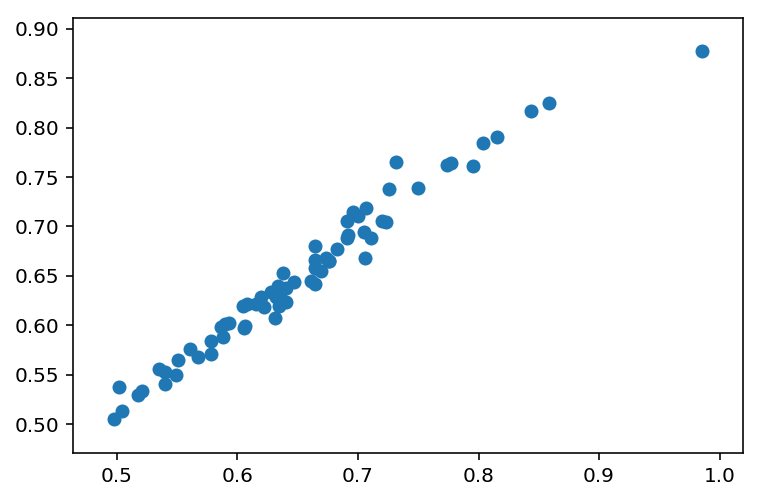

In [248]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(by_tournament.values, by_tournament_2.loc[by_tournament.index].values)

In [237]:
by_surface_2 = df_2.groupby('surface').apply(lambda x: Evaluator.logloss(np.ones(x.shape[0]), x['winner_prob'])).sort_values()
by_surface_2



surface
hard           0.621320
indoor_hard    0.622975
grass          0.635883
clay           0.649067
dtype: float64

In [238]:
by_surface = df.groupby('surface').apply(lambda x: Evaluator.logloss(np.ones(x.shape[0]), x['winner_prob'])).sort_values()
by_surface



surface
indoor_hard    0.620320
hard           0.624916
grass          0.633163
clay           0.651991
dtype: float64

In [253]:
# How did it go on the AO?
df = pd.read_csv('../../tennis-prediction/gp_laplace_2016_start_matern12_32_2019_logit.csv')
df['date'] = pd.to_datetime(df['date'])

df = df[df['date'].dt.year == 2019]
df = df[df['tournament_name'].str.contains('Australian Open')]

In [254]:
df.shape

(127, 19)

In [255]:
Evaluator.logloss(np.ones(df.shape[0]), df['winner_prob'])

0.5391737411197288

In [256]:
np.mean(df['winner_prob'] > 0.5)

0.7401574803149606

In [257]:
# Compare with Elo
elo_df = pd.read_csv('../../tennis-prediction/single_glicko_2000_start_7d_2018.csv')

elo_df['date'] = pd.to_datetime(elo_df['date'])

elo_df = elo_df[elo_df['date'].dt.year == 2019]
elo_df = elo_df[elo_df['tournament_name'].str.contains('Australian Open')]

Evaluator.logloss(np.ones(elo_df.shape[0]), elo_df['winner_prob']), np.mean(elo_df['winner_prob'] > 0.5)

(0.5312720639140296, 0.7165354330708661)

In [258]:
log_loss_contrib_elo = -np.log(elo_df['winner_prob']) / elo_df.shape[0]
log_loss_contrib_gp = -np.log(df['winner_prob']) / df.shape[0]

In [259]:
df['log_loss_diff'] = log_loss_contrib_gp.values - log_loss_contrib_elo.values

In [260]:
df['elo_win_prob'] = elo_df['winner_prob'].values

In [261]:
df.sort_values('log_loss_diff')[['winner', 'loser', 'winner_prob', 'elo_win_prob', 'log_loss_diff']].head()

,winner,loser,winner_prob,elo_win_prob,log_loss_diff
2842,Stefanos Tsitsipas,Roger Federer,0.225496,0.166608,-0.002383
2786,Alex Bolt,Jack Sock,0.227059,0.183863,-0.001662
2813,Alex Bolt,Gilles Simon,0.132737,0.110325,-0.001456
2740,Roberto Bautista Agut,Andy Murray,0.549483,0.463031,-0.001348
2747,Jordan Thompson,Feliciano Lopez,0.273741,0.240504,-0.001019


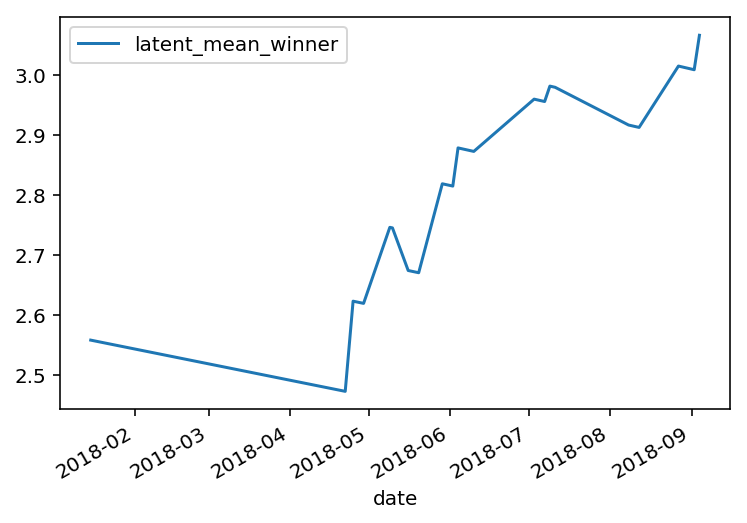

In [262]:
df_2[df_2['winner'] == 'Rafael Nadal'].plot(x='date', y='latent_mean_winner')